# Final Project: Food Pantry Visitor Tool  

Liliana Sheppard, GISC 6317  
Last Updated: 12/03/2024  
Purpose: This code generates an interactive map for a food pantry to visualize visitor locations collected through a user interface.  
____________________________________________________________________________________________________________________________________
Resources: https://python-visualization.github.io/folium/, https://nominatim.org/release-docs/latest/api/Search/,  https://docs.python-requests.org/, Lab 6-pandas instructions, https://docs.python.org/3/library/tkinter.html#the-canvas-widget.

In [1]:
# GUI Code for data with user interface
import tkinter as tk
from tkinter import ttk, messagebox
import pandas as pd
import re

# Function to validate email format
def is_valid_email(email):
    pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    return re.match(pattern, email)

# Function to validate zip code format (US 5-digit zip codes)
def is_valid_zip(zip_code):
    return zip_code.isdigit() and len(zip_code) == 5

# Function to save data
def save_data():
    email = entry_email.get()
    zip_code = entry_zip.get()
    country = entry_country.get()

    # Validate email and zip code
    if not is_valid_email(email):
        messagebox.showwarning("Please enter a valid email address.")
        return
    if not is_valid_zip(zip_code):
        messagebox.showwarning("Please enter a valid 5-digit zip code.")
        return

    # Collect data
    data_entry = {
        "Email": email,
        "First & Last Name": entry_name.get(),
        "Contact Number": entry_contact.get(),
        "Zip Code": zip_code,
        "Country": country,
        # shortened as much as possible
        "Preferred Contact": ", ".join([v.get() for v in preferred_contact if v.get()]),
        # shortened as much as possible
        "Additional Resources": ", ".join([v.get() for v in additional_resources if v.get()]),
        "Community Resources Accessibility": accessibility_var.get(),
        "Age Group": age_var.get()
    }
    # Ensure all required fields are filled
    for key, value in data_entry.items():
        if not value:
            messagebox.showwarning("Please fill the {key} field.")
            return

    # Save the data to CSV
    # Check if the file exists
    try:
        existing_data = pd.read_csv("visitor_data.csv")
        new_data = pd.DataFrame([data_entry])
        updated_data = pd.concat([existing_data, new_data], ignore_index=True)
        updated_data.to_csv("visitor_data.csv", index=False)
    except FileNotFoundError:
        pd.DataFrame([data_entry]).to_csv("visitor_data.csv", index=False)

    messagebox.showinfo("Success", "Data saved successfully!")
    form_reset()

# Function to reset the form
def form_reset():
    entry_email.delete(0, tk.END)
    entry_name.delete(0, tk.END)
    entry_contact.delete(0, tk.END)
    entry_zip.delete(0, tk.END)
    entry_country.delete(0, tk.END)
    entry_country.insert(0, "United States")  # Reset to default country
    for v in preferred_contact:
        v.set("")
    for v in additional_resources:
        v.set("")
    accessibility_var.set("3")
    age_var.set("")

# Initialize Tkinter
root = tk.Tk()
root.title("Food Pantry Visitor Tool")

# Set up the scroll bar
canvas = tk.Canvas(root)
scroll_frame = ttk.Frame(canvas)
scrollbar = ttk.Scrollbar(root, orient="vertical", command=canvas.yview)
canvas.configure(yscrollcommand=scrollbar.set)

scrollbar.pack(side="right", fill="y")
canvas.pack(side="left", fill="both", expand=True)
canvas.create_window((0, 0), window=scroll_frame, anchor="nw")
# shortened as much as possible
scroll_frame.bind("<Configure>", lambda e: canvas.configure(scrollregion=canvas.bbox("all")))

# Input Fields
data = []

# Email Field
tk.Label(scroll_frame, text="Email *").grid(row=0, column=0, sticky="w")
entry_email = tk.Entry(scroll_frame)
entry_email.grid(row=0, column=1, padx=5, pady=5)

# Name Field
# shortened as much as possible
tk.Label(scroll_frame, text="First & Last Name *").grid(row=1, column=0, sticky="w")
entry_name = tk.Entry(scroll_frame)
entry_name.grid(row=1, column=1, padx=5, pady=5)

# Contact Field
# shortened as much as possible
tk.Label(scroll_frame, text="Contact Number *").grid(row=2, column=0, sticky="w")
entry_contact = tk.Entry(scroll_frame)
entry_contact.grid(row=2, column=1, padx=5, pady=5)

# Zip Code Field
# shortened as much as possible
tk.Label(scroll_frame, text="What zip code do you live in? *").grid(row=3, column=0, sticky="w")
entry_zip = tk.Entry(scroll_frame)
entry_zip.grid(row=3, column=1, padx=5, pady=5)

# Country Field
# shortened as much as possible
tk.Label(scroll_frame, text="What country do you live in? *").grid(row=4, column=0, sticky="w")
entry_country = tk.Entry(scroll_frame)
entry_country.insert(0, "United States")  # Default country is United States
entry_country.grid(row=4, column=1, padx=5, pady=5)

# Preferred contact
# shortened as much as possible
tk.Label(scroll_frame, text="Preferred means of contact (check all that apply) *").grid(row=5, column=0, sticky="w")
preferred_contact_options = ["text", "call", "email", "Other"]
preferred_contact = [tk.StringVar() for _ in preferred_contact_options]
for i, option in enumerate(preferred_contact_options):
    # shortened as much as possible
    tk.Checkbutton(scroll_frame, text=option, variable=preferred_contact[i], onvalue=option, offvalue="").grid(row=6+i, column=0, sticky="w")

# Other resources
# shortened as much as possible
tk.Label(scroll_frame, text="What additional resources would you like information on? (check all that apply) *").grid(row=11, column=0, sticky="w")
resource_options = [
    "Volunteer Participation", "Urban garden education", "Internship", "Monthly Food Distribution/Emergency Food Relief",
    "Food Stamp Assistance", "Rental & Utility Assistance", "Voting Registration & Neighborhood policy updates",
    "Women's health (Birth Ed, Family Support, pregnancy test etc.)", "Child Care/Youth Enrichment",
    "Doula & Postpartum Care", "HIV & STD awareness/assistance", "Mental Health Support", "Financial Coaching & Literacy",
    "Job Opportunities", "Social Community Events", "Parent Advocacy & Resources", "Clinical Health Services w/ transportation (Medicaid&Medicare)",
    "Social Justice & Incarceration Assistance", "Other"
]
additional_resources = [tk.StringVar() for _ in resource_options]
for i, resource in enumerate(resource_options):
    # shortened as much as possible
    tk.Checkbutton(scroll_frame, text=resource, variable=additional_resources[i], onvalue=resource, offvalue="").grid(row=12+i, column=0, sticky="w")

# Scale
# shortened as much as possible
tk.Label(scroll_frame, text="Do you believe resources are readily accessible for those who live within your community?").grid(row=30, column=0, sticky="w")
accessibility_var = tk.StringVar(value="3")
tk.Scale(scroll_frame, from_=1, to=5, orient="horizontal", variable=accessibility_var).grid(row=31, column=0, sticky="w")

# Age Group
# shortened as much as possible
tk.Label(scroll_frame, text="Please disclose your age").grid(row=32, column=0, sticky="w")
age_options = [
    "Pre-Teen (11-13yrs)", "Adolescents (14-18yrs)", "18-24yrs", "24-34yrs", "35-44yrs", "45-54yrs",
    "55-64yrs", "65+ yrs", "Other"
]
age_var = tk.StringVar()
# shortened as much as possible
age_dropdown = ttk.Combobox(scroll_frame, textvariable=age_var, values=age_options)
age_dropdown.grid(row=33, column=0, sticky="w")

# Save Button
# shortened as much as possible
tk.Button(scroll_frame, text="Save Data", command=save_data).grid(row=34, column=0, pady=10)

root.mainloop()

In [75]:
# Generate a map
# timeout bc I ran into time error
import pandas as pd
import folium
import requests
import time

# Geocoding with error handling
def geocode_address(zip_code, country="United States"):
    # shortened as much as possible
    url = f"https://nominatim.openstreetmap.org/search?format=json&postalcode={zip_code}&country={country}"
    headers = {
        "User-Agent": "YourAppName/1.0 (your_email@example.com)"
    }
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        data = response.json()
        if data:
            return float(data[0]['lat']), float(data[0]['lon'])
        else:
            print(f"No results found for zip code: {zip_code} in {country}")
            return None, None
    except requests.exceptions.RequestException as e:
        print(f"Error connecting to the geocoding service: {e}")
        return None, None
    except (ValueError, KeyError):
        print(f"Error parsing geocoding response for zip code: {zip_code}")
        return None, None

# Create map with improved error handling and debugging
def create_map():
    try:
        df = pd.read_csv("visitor_data.csv")
    except FileNotFoundError:
        print("Error: The 'visitor_data.csv' file was not found.")
        return

    # Initialize a map centered on the United States
    visitor_map = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

    # Iterate through the CSV data and geocode
    # shortened as much as possible
    for _, row in df.iterrows():
        print(f"Processing: {row['First & Last Name']} with Zip Code: {row['Zip Code']} and Country: {row['Country']}")
        lat, lon = geocode_address(row["Zip Code"], row["Country"])
        if lat and lon:
            print(f"Geocoded: {row['First & Last Name']} -> Lat: {lat}, Lon: {lon}")
            # Add a marker to the map for the geocoded location
            # Add a 1-second delay between requests to avoid rate-limiting
            folium.Marker(location=[lat, lon], popup=row["First & Last Name"]).add_to(visitor_map)
        else:
            print(f"Could not geocode the address for: {row['First & Last Name']}")
        time.sleep(1)

    # Save the map to an HTML file
    # shortened as much as possible
    visitor_map.save("visitor_map.html")
    print("Map saved as 'visitor_map.html'. You can open this file in a browser.")

# Run the function
create_map()

Processing: Liliana Sheppard with Zip Code: 75211 and Country: United States
Geocoded: Liliana Sheppard -> Lat: 32.74192792582253, Lon: -96.88147606231306
Processing: Araceli Sheppard with Zip Code: 75080 and Country: United States
Geocoded: Araceli Sheppard -> Lat: 32.97084395745554, Lon: -96.74263264883722
Map saved as 'visitor_map.html'. You can open this file in a browser.


In [86]:
# Display the map and marker
from IPython.display import IFrame
IFrame("visitor_map.html", width=800, height=600)

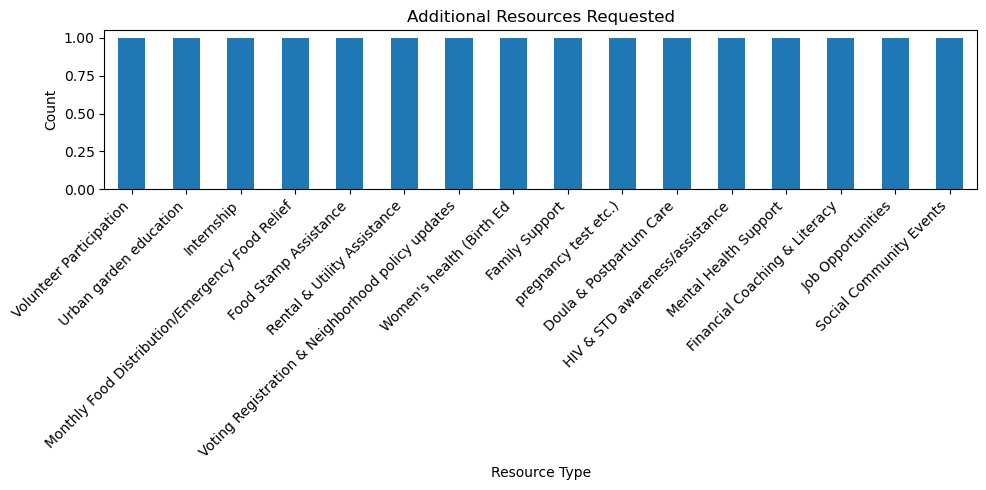

In [60]:
# Generate visitor reports for additional resources
import pandas as pd
import matplotlib.pyplot as plt

def generate_report():
    df = pd.read_csv("visitor_data.csv")
    resource_report = df["Additional Resources"].str.split(", ").explode().value_counts()
    resource_report.plot(kind="bar", figsize=(10, 5))
    plt.title("Additional Resources Requested")
    plt.xlabel("Resource Type")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

generate_report()